In [2]:
# Simple CNN model for CIFAR-10
import numpy as np
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils

In [3]:
np.random.seed(7)

In [4]:
# This loads the CIFAR-10 dataset which is a collection of images in 10 classes
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [5]:
# Converts the pixel values of the training and test images to floating point numbers and Normalize them between 0 and 1 by dividing with 255.0
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [6]:
# Converts the class labels of training and test set to vectors
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

# Determines the number of classes in the CIFAR-10 dataset
num_classes = y_test.shape[1]

In [7]:
# Initialize a new sequential model object
model = Sequential()

# Add a 2D Convolutional layer with 32 filters, a 3*3 kernal size and 'same' padding
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu', kernel_constraint=maxnorm(3)))

# Add a dropout layer with a rate of 0.2 to reduce overfitting
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))

# Add a max pooling layer with the pool size of 2*2 and the 'same' padding
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

# Flatten the output of the convolutional layers into a 1D array
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))

# Add a fully connected dense layer with num_classes units and softmax function
model.add(Dense(num_classes, activation='softmax'))


In [8]:
# Creating a new instance of the SGD optimizer with a learning rate of 0.01, momentum of 0.9, and decay of 1e-6
sgd = SGD(learning_rate=0.01, momentum=0.9, decay=1e-6)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

# Print the summary
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 512)               4194816   
                                                        

In [9]:
# Set the number of epochs and batch size for training
epochs = 5
batch_size = 32
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size)


Epoch 1/5
1563/1563 [==============================] - 366s 234ms/step - loss: 1.7205 - accuracy: 0.3755 - val_loss: 1.4361 - val_accuracy: 0.4849
Epoch 2/5
1563/1563 [==============================] - 354s 226ms/step - loss: 1.3304 - accuracy: 0.5215 - val_loss: 1.1432 - val_accuracy: 0.5979
Epoch 3/5
1563/1563 [==============================] - 342s 219ms/step - loss: 1.1418 - accuracy: 0.5934 - val_loss: 1.0694 - val_accuracy: 0.6166
Epoch 4/5
1563/1563 [==============================] - 329s 210ms/step - loss: 1.0121 - accuracy: 0.6427 - val_loss: 1.0149 - val_accuracy: 0.6425
Epoch 5/5
1563/1563 [==============================] - 337s 216ms/step - loss: 0.9008 - accuracy: 0.6839 - val_loss: 0.9686 - val_accuracy: 0.6601


In [10]:
# evaluate the trained model on the test set and report the accuracy
scores = model.evaluate(X_test, y_test, verbose=0)

# Print the accuracy as the percaentage to the console
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 66.01%


In [11]:
import numpy as np
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.constraints import maxnorm
from keras.utils import np_utils
from keras.optimizers import SGD

# Fix random seed for reproducibility
np.random.seed(7)

# Load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# One hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

# Create the model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

# Compile model
epochs = 5
learning_rate = 0.01
decay_rate = learning_rate / epochs
sgd = SGD(lr=learning_rate, momentum=0.9, decay=decay_rate, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())

# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)

# Evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1] * 100))


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 dropout_2 (Dropout)         (None, 32, 32, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 dropout_3 (Dropout)         (None, 16, 16, 64)        0         
                                                      

C:\Users\vishn\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\optimizers\legacy\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


 dropout_6 (Dropout)         (None, 1024)              0         
                                                                 
 dense_3 (Dense)             (None, 512)               524800    
                                                                 
 dropout_7 (Dropout)         (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 10)                5130      
                                                                 
Total params: 2,915,114
Trainable params: 2,915,114
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5
1563/1563 [==============================] - 643s 410ms/step - loss: 1.8719 - accuracy: 0.3052 - val_loss: 1.6018 - val_accuracy: 0.4235
Epoch 2/5
1563/1563 [==============================] - 228s 146ms/step - loss: 1.5058 - accuracy: 0.4509 - val_loss: 1.3740 - val_accuracy: 0.5050
Epoch 3/5
1563/1563 [==========

In [14]:
# Predict the first 4 images of the test data
predictions = model.predict(X_test[:4])
# Convert the predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)
# Convert the actual labels to class labels
actual_labels = np.argmax(y_test[:4], axis=1)

# Print the predicted and actual labels for the first 4 images
print("Predicted labels:", predicted_labels)
print("Actual labels:   ", actual_labels)


1/1 [==============================] - 0s 32ms/step
Predicted labels: [3 8 8 8]
Actual labels:    [3 8 8 0]


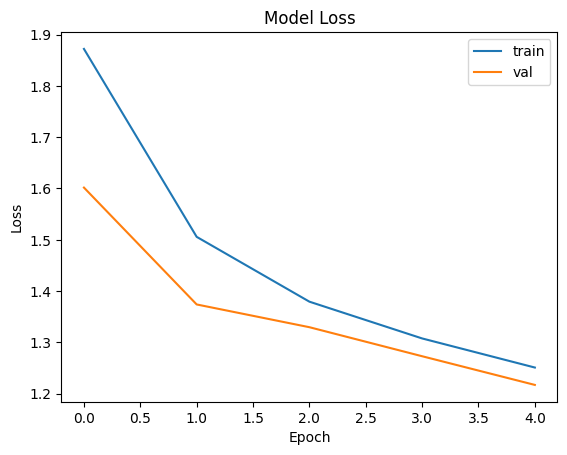

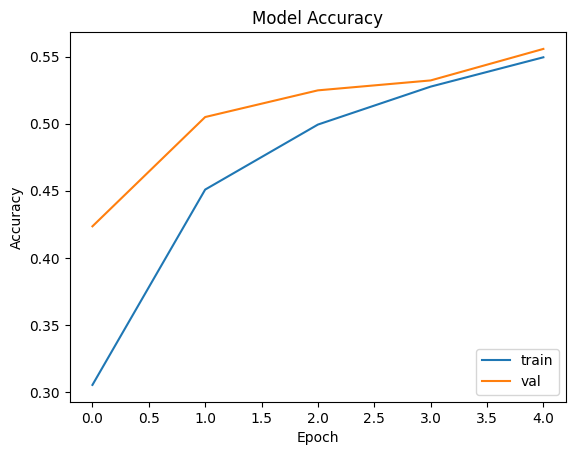

In [15]:
import matplotlib.pyplot as plt

# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()
